#### Dealing with Unbalanced Dataset

This notebook addresses the challenge of dealing with an imbalanced dataset, particularly in the context of fraud detection. It explores techniques such as undersampling to balance the dataset by reducing the majority class instances, as well as oversampling methods like SMOTE and ADASYN to generate synthetic samples for the minority class. Finally, it demonstrates how to train and evaluate a machine learning model using the resampled data to improve classification performance.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# the dataset is available on kaggle.com
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Import dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

The dataset has 284,807 rows and 31 columns, which is very imbalanced

In [4]:
# check for null values
df.isnull().values.any()

False

#### EDA

In [5]:
# Statistics for the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Count the occurrences of each unique value in the 'Class' column
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0 --> Normal Transaction

1 --> fraudulent transaction

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

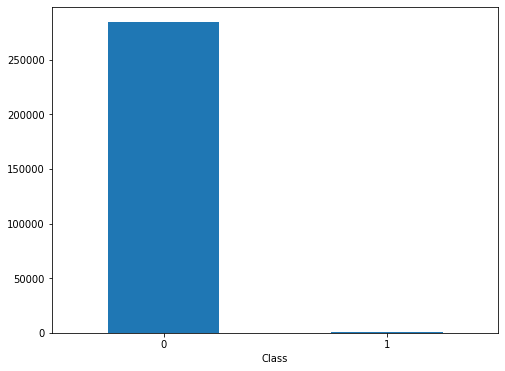

In [7]:
# Plotting the distribution of transaction classes

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Count the occurrences of each unique value in the 'Class' column and store it in 'classes'
classes = pd.value_counts(df['Class'], sort=True)

# Plot a bar graph representing the distribution of transaction classes
classes.plot(kind='bar', rot=0)

# Set title, x-axis label, and y-axis label for the plot
plt.title

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

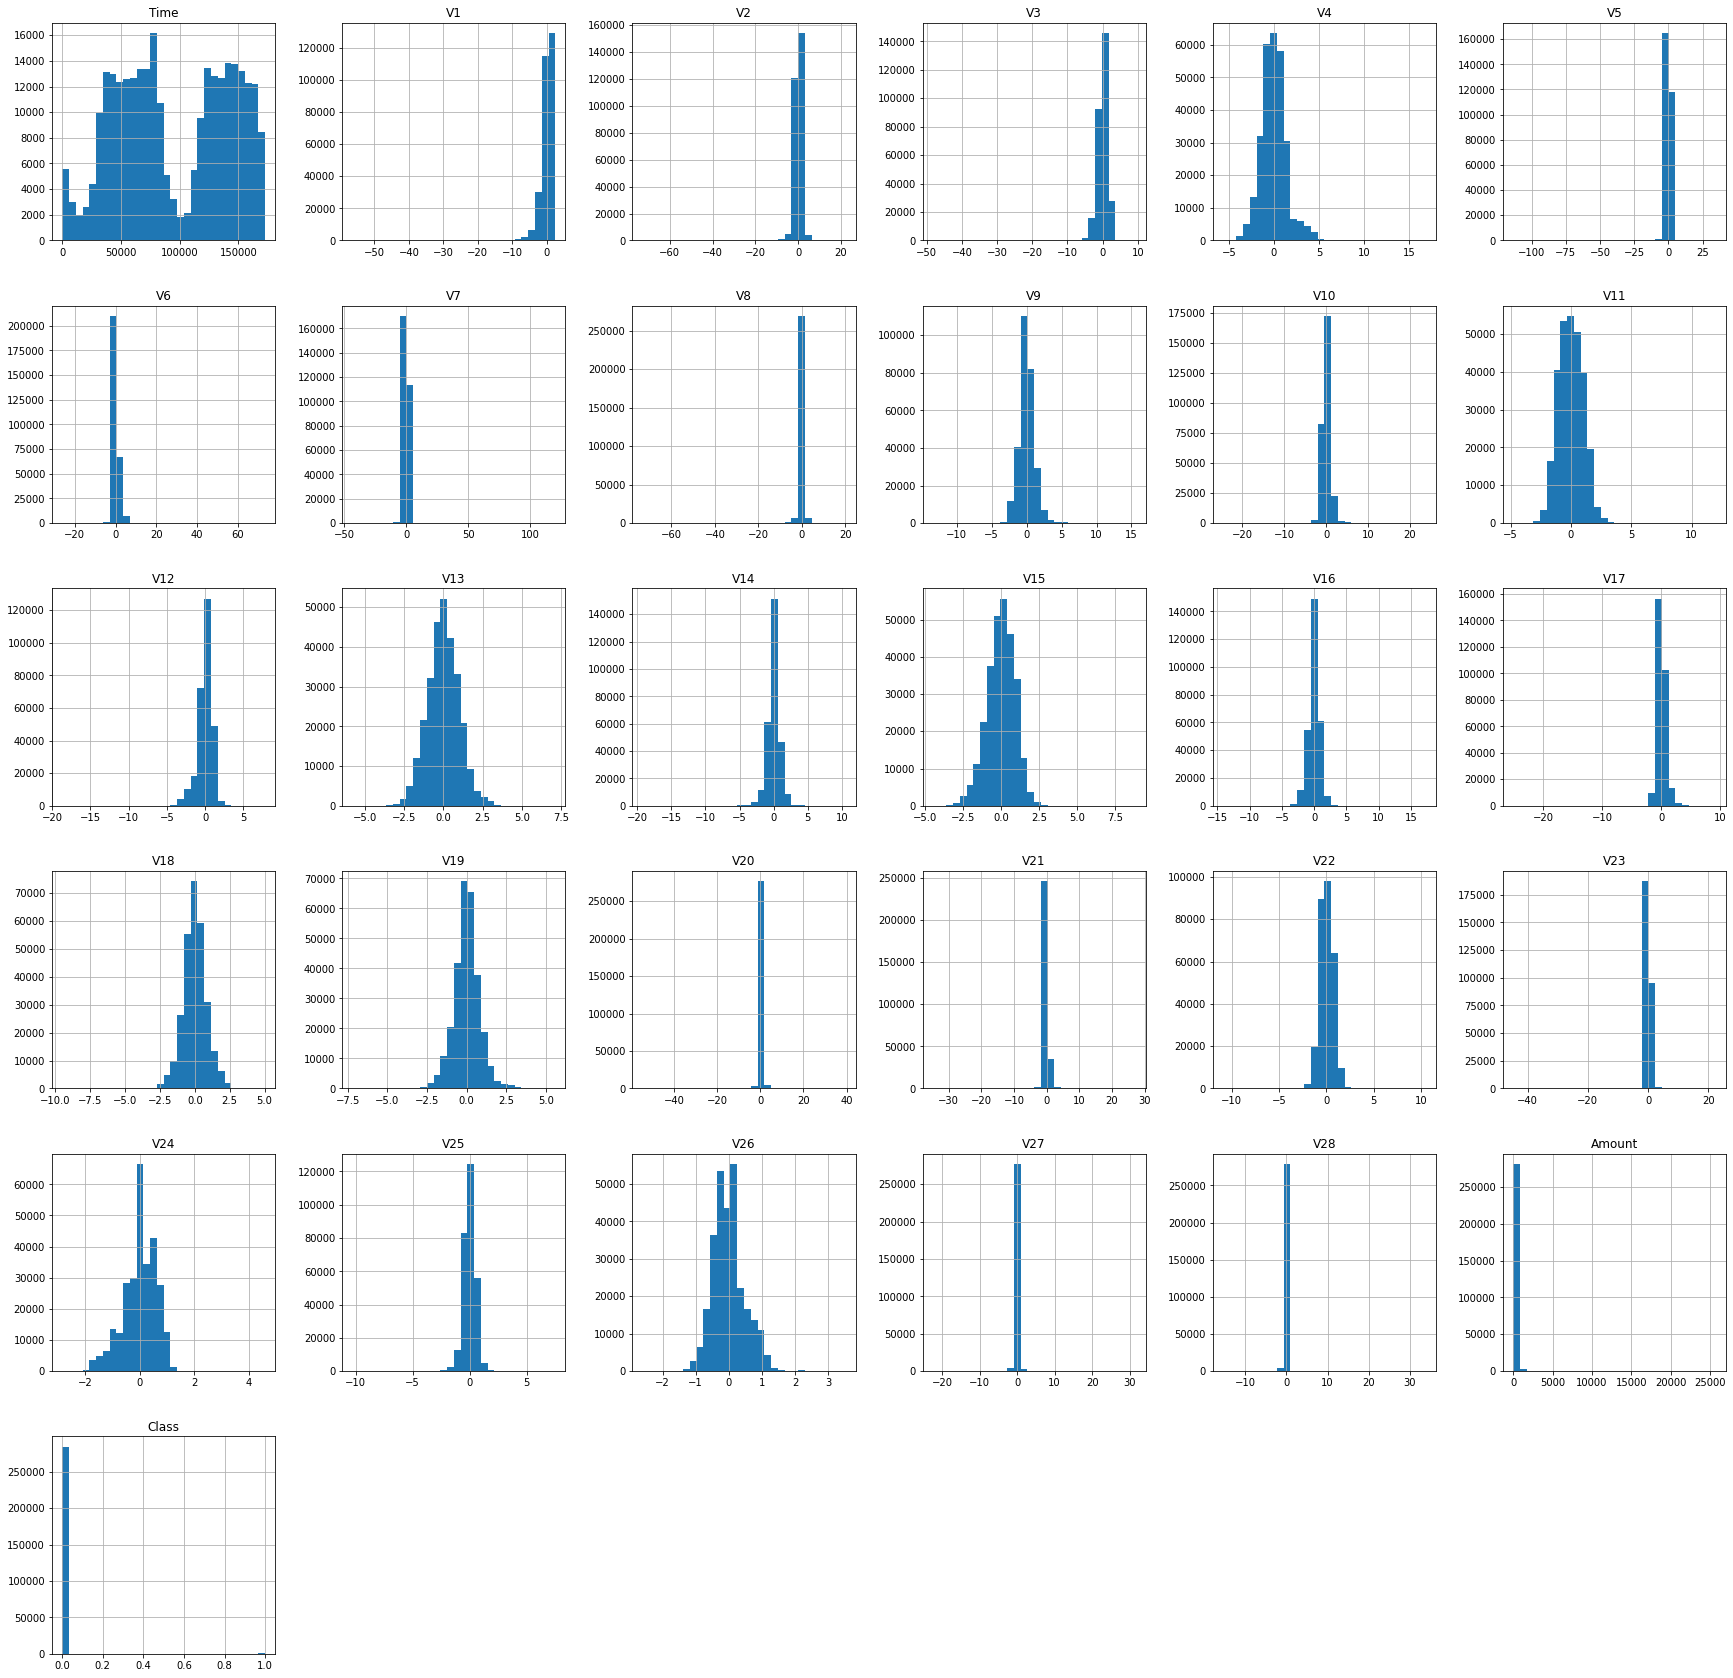

In [8]:
# Generate histograms for each column in the DataFrame
df.hist(bins=30, figsize=(30, 30))

In [9]:
# separating the data for analysis

# Create a subset of the dataframe where 'Class' column has a value of 0, indicating normal transactions
normal = df[df.Class == 0]

# Create another subset of the dataframe where 'Class' column has a value of 1, indicating fraudulent transactions
fraud = df[df.Class == 1]

In [10]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


#### statistical measures of the data

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# compare the mean values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321



We are going to do Under-Sampling, by building a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions, for the datasets fr both normal and fraudulent to be the same.

Number of Fraudulent Transactions is 492

### Undersampling

Undersampling is a technique used to address class imbalance in datasets by reducing the number of instances in the majority class (the class with more instances) to match the number of instances in the minority class (the class with fewer instances). The goal is to balance the class distribution, making the dataset more suitable for training machine learning models without biasing them towards the majority class.

Here's how undersampling works:

1. **Identify Minority and Majority Classes:** Undersampling starts by identifying the minority and majority classes in the dataset based on the distribution of the target variable.

2. **Randomly Select Instances from Majority Class:** Once the minority and majority classes are identified, undersampling randomly selects a subset of instances from the majority class. The number of instances selected is typically equal to the number of instances in the minority class, effectively reducing the size of the majority class.

3. **Create Balanced Dataset:** After selecting instances from the majority class, undersampling combines them with all instances from the minority class to create a new balanced dataset. This balanced dataset contains an equal number of instances from both classes.


While undersampling can effectively address class imbalance and reduce the risk of bias towards the majority class, it's important to note that it may discard potentially useful information from the majority class. Additionally, if the dataset is very imbalanced or small, undersampling may further reduce the amount of available data for training, potentially impacting the model's ability to generalize. Therefore, it's essential to carefully consider the trade-offs and potential implications of using undersampling in your specific context.

In [14]:
# Sampling a subset of normal transactions to match the number of fraudulent transactions

# Using the sample method on the 'normal' DataFrame to randomly select 492 transactions
# This ensures that the number of normal transactions matches the number of fraudulent transactions
normal_sample = normal.sample(n=492)

In [15]:
# Concatenating new dataframe

# Concatenating two dataframes - 'normal_sample' (subset of normal transactions) and 'fraud' (subset of fraudulent transactions)
# along the rows (axis=0) to create a new dataframe 'new_dataset'
new_dataset = pd.concat([normal_sample, fraud], axis=0)

In [16]:
# show new dataset
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
49685,44162.0,1.093784,-0.062458,1.062763,1.637196,-0.752417,0.078404,-0.405737,0.175876,0.917616,...,-0.068387,0.151988,-0.026045,0.410916,0.554456,-0.276344,0.070496,0.025011,9.00,0
162919,115485.0,-1.053022,-0.279210,1.393868,-2.036797,-0.330714,1.980066,0.069164,0.399557,-1.149091,...,0.457030,1.428590,-0.508838,-1.567490,0.346333,0.234725,-0.033653,-0.016653,170.00,0
259841,159292.0,2.034874,-0.112304,-1.847935,0.623233,0.226045,-0.735289,-0.015206,-0.107288,1.017750,...,0.041012,0.320103,0.030252,0.614081,0.159008,0.703407,-0.067322,-0.040991,12.06,0
169271,119608.0,1.613842,-0.422583,-1.821937,1.561671,0.253582,-1.062038,0.959394,-0.500462,0.109862,...,0.185214,0.296908,-0.196513,0.015407,0.394047,-0.513865,-0.052383,-0.023660,223.49,0
50624,44572.0,-0.604480,-0.373701,1.450452,-2.274824,-1.541518,-0.221634,-1.383127,-2.586522,-0.261201,...,-1.593701,-0.398603,-0.146209,0.313481,1.112056,-0.776493,0.059442,0.204788,129.97,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [19]:
# compare the mean values for both transactions
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97324.489837,0.079150,-0.002927,-0.045545,0.164491,0.092237,-0.051958,-0.096055,-0.111711,0.028164,...,-0.004420,0.040100,-0.010961,0.024441,-0.016975,-0.054964,0.028817,-0.006156,0.010507,78.196565
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Feature Extraction

In [20]:
# Extracting features and target variable from the new dataset

# Dropping the 'Class' column from the new_dataset to create feature matrix X
X = new_dataset.drop(columns='Class', axis=1)

# Assigning the 'Class' column as the target variable Y
Y = new_dataset['Class']

In [21]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
49685    44162.0  1.093784 -0.062458  1.062763  1.637196 -0.752417  0.078404   
162919  115485.0 -1.053022 -0.279210  1.393868 -2.036797 -0.330714  1.980066   
259841  159292.0  2.034874 -0.112304 -1.847935  0.623233  0.226045 -0.735289   
169271  119608.0  1.613842 -0.422583 -1.821937  1.561671  0.253582 -1.062038   
50624    44572.0 -0.604480 -0.373701  1.450452 -2.274824 -1.541518 -0.221634   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [22]:
print(Y)

49685     0
162919    0
259841    0
169271    0
50624     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


#### Split the data into Training data & Testing Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


#### Model Training

In [25]:
# Instantiating a Logistic Regression model
model = LogisticRegression()

# Training the Logistic Regression model on the training data
model.fit(X_train, Y_train)

LogisticRegression()

#### Model Evaluation

In [26]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9453621346886912


In [27]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9137055837563451


### SMOTE
SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a method used to address class imbalance in datasets, particularly in the context of machine learning classification tasks. It aims to alleviate the issue of imbalanced class distributions by oversampling the minority class (the class with fewer instances) through the creation of synthetic examples.

Here's a simplified explanation of how SMOTE works:

1. **Identify Minority Class Instances:** SMOTE starts by identifying the instances belonging to the minority class in the dataset.

2. **Select Nearest Neighbors:** For each minority class instance, SMOTE selects its k nearest neighbors in the feature space. The number of neighbors (k) is a parameter specified by the user.

3. **Generate Synthetic Samples:** For each minority class instance, SMOTE creates synthetic samples along the line segments joining the instance to its k nearest neighbors. These synthetic samples are created by randomly selecting points along these line segments.

4. **Repeat Until Desired Balance is Achieved:** SMOTE repeats this process until the desired balance between the minority and majority classes is achieved or until a specified stopping criterion is met.

By generating synthetic samples, SMOTE effectively increases the number of minority class instances, making the class distribution more balanced. This helps prevent classifiers from being biased towards the majority class and improves their ability to accurately classify minority class instances.

It's worth noting that while SMOTE can be effective in addressing class imbalance, it may also introduce some level of noise into the dataset, particularly if the synthetic samples are not representative of the true underlying distribution. Therefore, it's important to carefully consider the application of SMOTE and to evaluate its impact on the performance of the classifier.

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
# having the dataset loaded as 'df' with features (X) and target variable (Y)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

In [30]:
# Extracting features and target variable from the new dataset

# Dropping the 'Class' column from the new_dataset to create feature matrix X
X = df.drop(columns='Class', axis=1)

# Assigning the 'Class' column as the target variable Y
Y = df['Class']

In [31]:
# Apply SMOTE to generate synthetic samples
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [32]:
# Split the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(284807, 30) (454904, 30) (113726, 30)


In [34]:
# Train a model (e.g., Logistic Regression) on the resampled training data
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [35]:
# Evaluate the model
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9737592986652128


In [36]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9739021859557181


#### ADASYN

ADASYN, which stands for Adaptive Synthetic Sampling, is an extension of the SMOTE (Synthetic Minority Over-sampling Technique) algorithm designed to address some of its limitations. Like SMOTE, ADASYN is used to tackle class imbalance in datasets by oversampling the minority class. However, ADASYN aims to adaptively generate synthetic samples based on the local density of minority class instances.

Here's how ADASYN works:

1. **Identify Minority Class Instances:** ADASYN starts by identifying the instances belonging to the minority class in the dataset, similar to SMOTE.

2. **Compute Density:** For each minority class instance, ADASYN computes the density of its local neighborhood. This density is typically measured as the number of minority class instances in a given radius around the instance.

3. **Calculate Imbalance Ratio:** ADASYN calculates an imbalance ratio for each instance, which represents the imbalance between the number of minority and majority class instances in its local neighborhood. Instances with higher imbalance ratios are considered more difficult to learn.

4. **Generate Synthetic Samples:** ADASYN then focuses on generating synthetic samples for instances with higher imbalance ratios, prioritizing those instances that are more challenging to classify. It generates synthetic samples for each such instance by interpolating between it and its nearest neighbors, similar to SMOTE.

5. **Repeat Until Desired Balance is Achieved:** ADASYN repeats this process until the desired balance between the minority and majority classes is achieved or until a specified stopping criterion is met.

By adaptively generating synthetic samples based on the local density of minority class instances, ADASYN aims to focus more on difficult-to-learn instances, potentially leading to better performance compared to SMOTE. This adaptive approach allows ADASYN to handle scenarios where there are varying degrees of difficulty among minority class instances, improving the effectiveness of oversampling in addressing class imbalance.

In summary, ADASYN provides an enhanced oversampling technique compared to SMOTE by dynamically adjusting the generation of synthetic samples based on the local density of minority class instances, thereby improving its ability to handle imbalanced datasets.

In [37]:
# Import necessary libraries
from imblearn.over_sampling import ADASYN


# Instantiate ADASYN
adasyn = ADASYN(random_state=42)

In [38]:
# Extracting features and target variable from the new dataset

# Dropping the 'Class' column from the new_dataset to create feature matrix X
X = df.drop(columns='Class', axis=1)

# Assigning the 'Class' column as the target variable Y
Y = df['Class']

In [39]:
# Apply ADASYN to generate synthetic samples
X_resampled, Y_resampled = adasyn.fit_resample(X, Y)

# Split the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(284807, 30) (454890, 30) (113723, 30)


In [41]:
# Train a model (e.g., Logistic Regression) on the resampled training data
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [42]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9720679724768625


In [43]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9711228159651082
